In [1]:
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
class DBSCAN():
  
    def __init__(self, dataset=None, eps=2.0, minPts=2):
        self.dataset = dataset
        self.eps = eps
        self.minPts = minPts
        self.clusters = []

    def run(self):
        noise = Cluster(None)

        self.clusters.append(noise)

        for point in self.dataset:
            if not point.visited:
                point.setVisited()

                neighbourPoints = self.regionQuery(point)

                if len(neighbourPoints) < self.minPts:
                    noise.addPoint(point)
                else:
                    c = Cluster(None)
                    self.expandCluster(c, point, neighbourPoints)

            if c not in self.clusters:
                self.clusters.append(c)

    def expandCluster(self, c, point, neighbourPoints):
        c.addPoint(point)

        for p in neighbourPoints:
            if not p.visited:
                p.setVisited()
                pNeighbourPoints = self.regionQuery(p)

                if len(pNeighbourPoints) >= self.minPts:
                    neighbourPoints.extend(pNeighbourPoints)

            if not p.isMember:
                c.addPoint(p)

    def regionQuery(self, givenPoint):
        result = []
        for point in self.dataset:
            if point.distance(givenPoint) <= self.eps:
                result.append(point)

        return result

    def getResult(self):
        return self.clusters

    def draw(self):
        xmax, xmin, ymax, ymin = (0, 0, 0, 0)

        for num, cluster in enumerate(self.clusters):
            print('Drawing cluster', num, 'with', len(cluster.points), 'points')
            for point in cluster.points:
                xmax, xmin = (max(xmax, point.x), min(xmin, point.x))
                ymax, ymin = (max(ymax, point.y), min(ymin, point.y))
                plt.plot([point.x], [point.y], cycle_color(num) + 'o')

        plt.axis([xmin - 1, xmax + 1, ymin - 1, ymax + 1])
        plt.show()

In [3]:
class Cluster():
    
    def __init__(self, points):
        if isinstance(points, list):
            self.points = points
        elif isinstance(points, Point):
            self.points = [points]
        elif points is None:
            self.points = []

    def addPoint(self, point):
        self.points.append(point)
        point.setMember()

    def __repr__(self):
        return '{0}'.format(self.points)

In [4]:
class Point():
    
    def __init__(self, x, y):
        self.x = float(x)
        self.y = float(y)
        self.visited = False
        self.isMember = False

    def distance(self, point):
        return sqrt((point.x - self.x)**2 + (point.y - self.y)**2)

    def setMember(self):
        self.isMember = True

    def setVisited(self):
        self.visited = True

    def __repr__(self):
        return "[%.2f, %.2f]" % (self.x, self.y)

In [5]:
def load_dataset(name, separator=','):
  
    result = []
    with open(name, 'r') as dataset:
        for line in dataset:
            parts = line.strip().split(separator)
            result.append(Point(parts[0], parts[1]))
    return result

In [6]:
def cycle_color(id):
    
    colors = ['g', 'b', 'k', 'c', 'm', 'y', 'r']
    try:
        return colors[id]
    except IndexError:
        return colors[id % len(colors)]

Drawing cluster 0 with 0 points
Drawing cluster 1 with 478 points


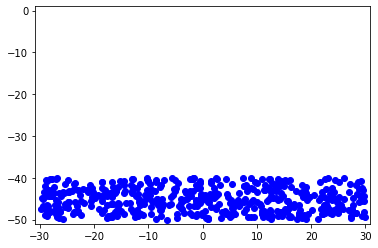

In [7]:
if __name__ == '__main__':
    data = load_dataset('boxes.csv')

    dbscan = DBSCAN(dataset=data, eps=2, minPts=2)
    dbscan.run()
    dbscan.draw()